# Histograms

A histogram is used to plot the distribution of a numeric variable. 

It's  used the quantitative variables beacuse rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number.

On the x-axis we have the features values, while on the y-axis we have the frequency(count)

The size of the bin affects the way we interpret the data. If the bin size is:
- too large we lost information about the general distribution of our data 
- too small, there will be too noise that won't allow us to correctly interpret the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# this allow to use matplotlib in the notebook
%matplotlib inline 

In [2]:
# importing data
pokemon_data = pd.read_csv('./data/pokemon.csv')
pkmn_type = pokemon_data.melt(id_vars=['id', 'species'], value_vars=['type_1', 'type_2'], var_name='type_level', value_name='type').dropna()

To create a histogram, we can use the `hist` function provided by pyplot. 

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data.

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

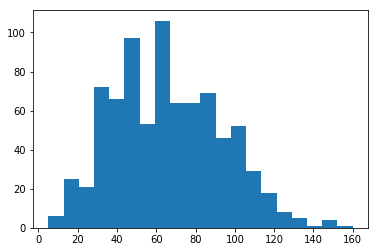

In [3]:
plt.hist(data=pokemon_data, x='speed', bins=20)

This allows us to have a look at the data but we same some issue with ackward bin boundaries. Taking a look at them in the set of arrays, we can see that the bin edges are non-integer
and the data values are integers means that some bins cover more integer values than others.

A better solution is to specify the bin boundaries explicitly.

To do so, We:
- use descriptive statistics (e.g. via df['numerical_var'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot
- get the max value for that features and we sum it with 1
- create an ndarray using the np.arange fun setting the min, max, and the step values
- use the generated bin edges as value for the bins paramenter of the hist fun

**Note**

To hide the bounds we can use the `;` char.

In [4]:
pokemon_data['speed'].describe()

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

In [13]:
bin_edges = np.arange(0, pokemon_data['speed'].max()+1, 5)

In [6]:
bin_edges

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160])

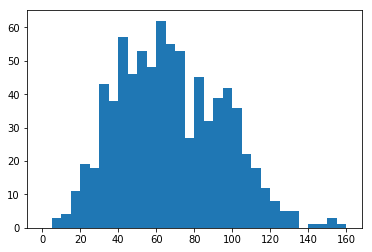

In [7]:
plt.hist(data=pokemon_data, x='speed', bins=bin_edges);

As we can notice, the chart is different from the previous one showing that at x=[135,140] there is gap.

Instead of a step of 5, if we use a step=1 for the generation of the edges we'll have a lot of noise that makes our data unreadable.

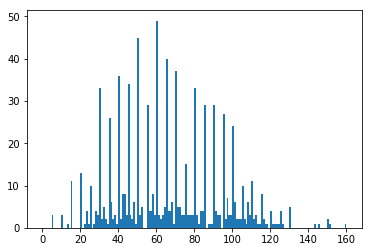

In [12]:
bin_edges_step1 = np.arange(0, pokemon_data['speed'].max()+1, 1)
plt.hist(data=pokemon_data, x='speed', bins=bin_edges_step1);

Another solution provided by seaborn lib is to use the [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) that combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn `kdeplot()` (i.e. the kernel density estimate) and `rugplot()` (i.e. )functions.

The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but **the area under the curve should equal 1**.

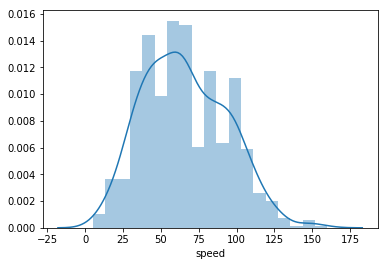

In [9]:
sb.distplot(pokemon_data['speed']);

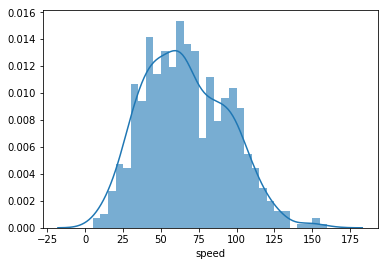

In [17]:
sb.distplot(pokemon_data['speed'], bins=bin_edges, hist_kws={'alpha' : 0.6});

if we want to remove the kernel density estimate (kde) curve, we can simply set the kde parameter to False

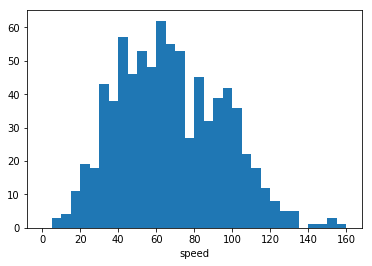

In [21]:
sb.distplot(pokemon_data['speed'], bins=bin_edges, hist_kws={'alpha' : 1}, kde=False);

In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional functionality offered by distplot, then you might be better off with just using Matplotlib's hist function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic distplot first before getting into the customization.